In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
# Reading Data file
df = pd.read_csv(r"C:\Users\keval\Desktop\Python\Project\diabetis_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [310]:
# Data Exploration and Preprocessing 
df.patient_nbr.nunique() # KNowing number of unique values in patient column i.e eliminating repeated visits and considering only one visit per patient
df = df.drop_duplicates(subset = ["patient_nbr"])
df1 = df.iloc[:,[2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,42,48,49]]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71518 non-null  object
 1   gender                    71518 non-null  object
 2   age                       71518 non-null  object
 3   admission_type_id         71518 non-null  int64 
 4   discharge_disposition_id  71518 non-null  int64 
 5   admission_source_id       71518 non-null  int64 
 6   time_in_hospital          71518 non-null  int64 
 7   payer_code                71518 non-null  object
 8   medical_specialty         71518 non-null  object
 9   num_lab_procedures        71518 non-null  int64 
 10  num_procedures            71518 non-null  int64 
 11  num_medications           71518 non-null  int64 
 12  number_outpatient         71518 non-null  int64 
 13  number_emergency          71518 non-null  int64 
 14  number_inpatient     

In [311]:
# Data Cleaning - Replacing null Values with other
df1.race = df1.race.fillna("other")
df1.race.isnull().any()

False

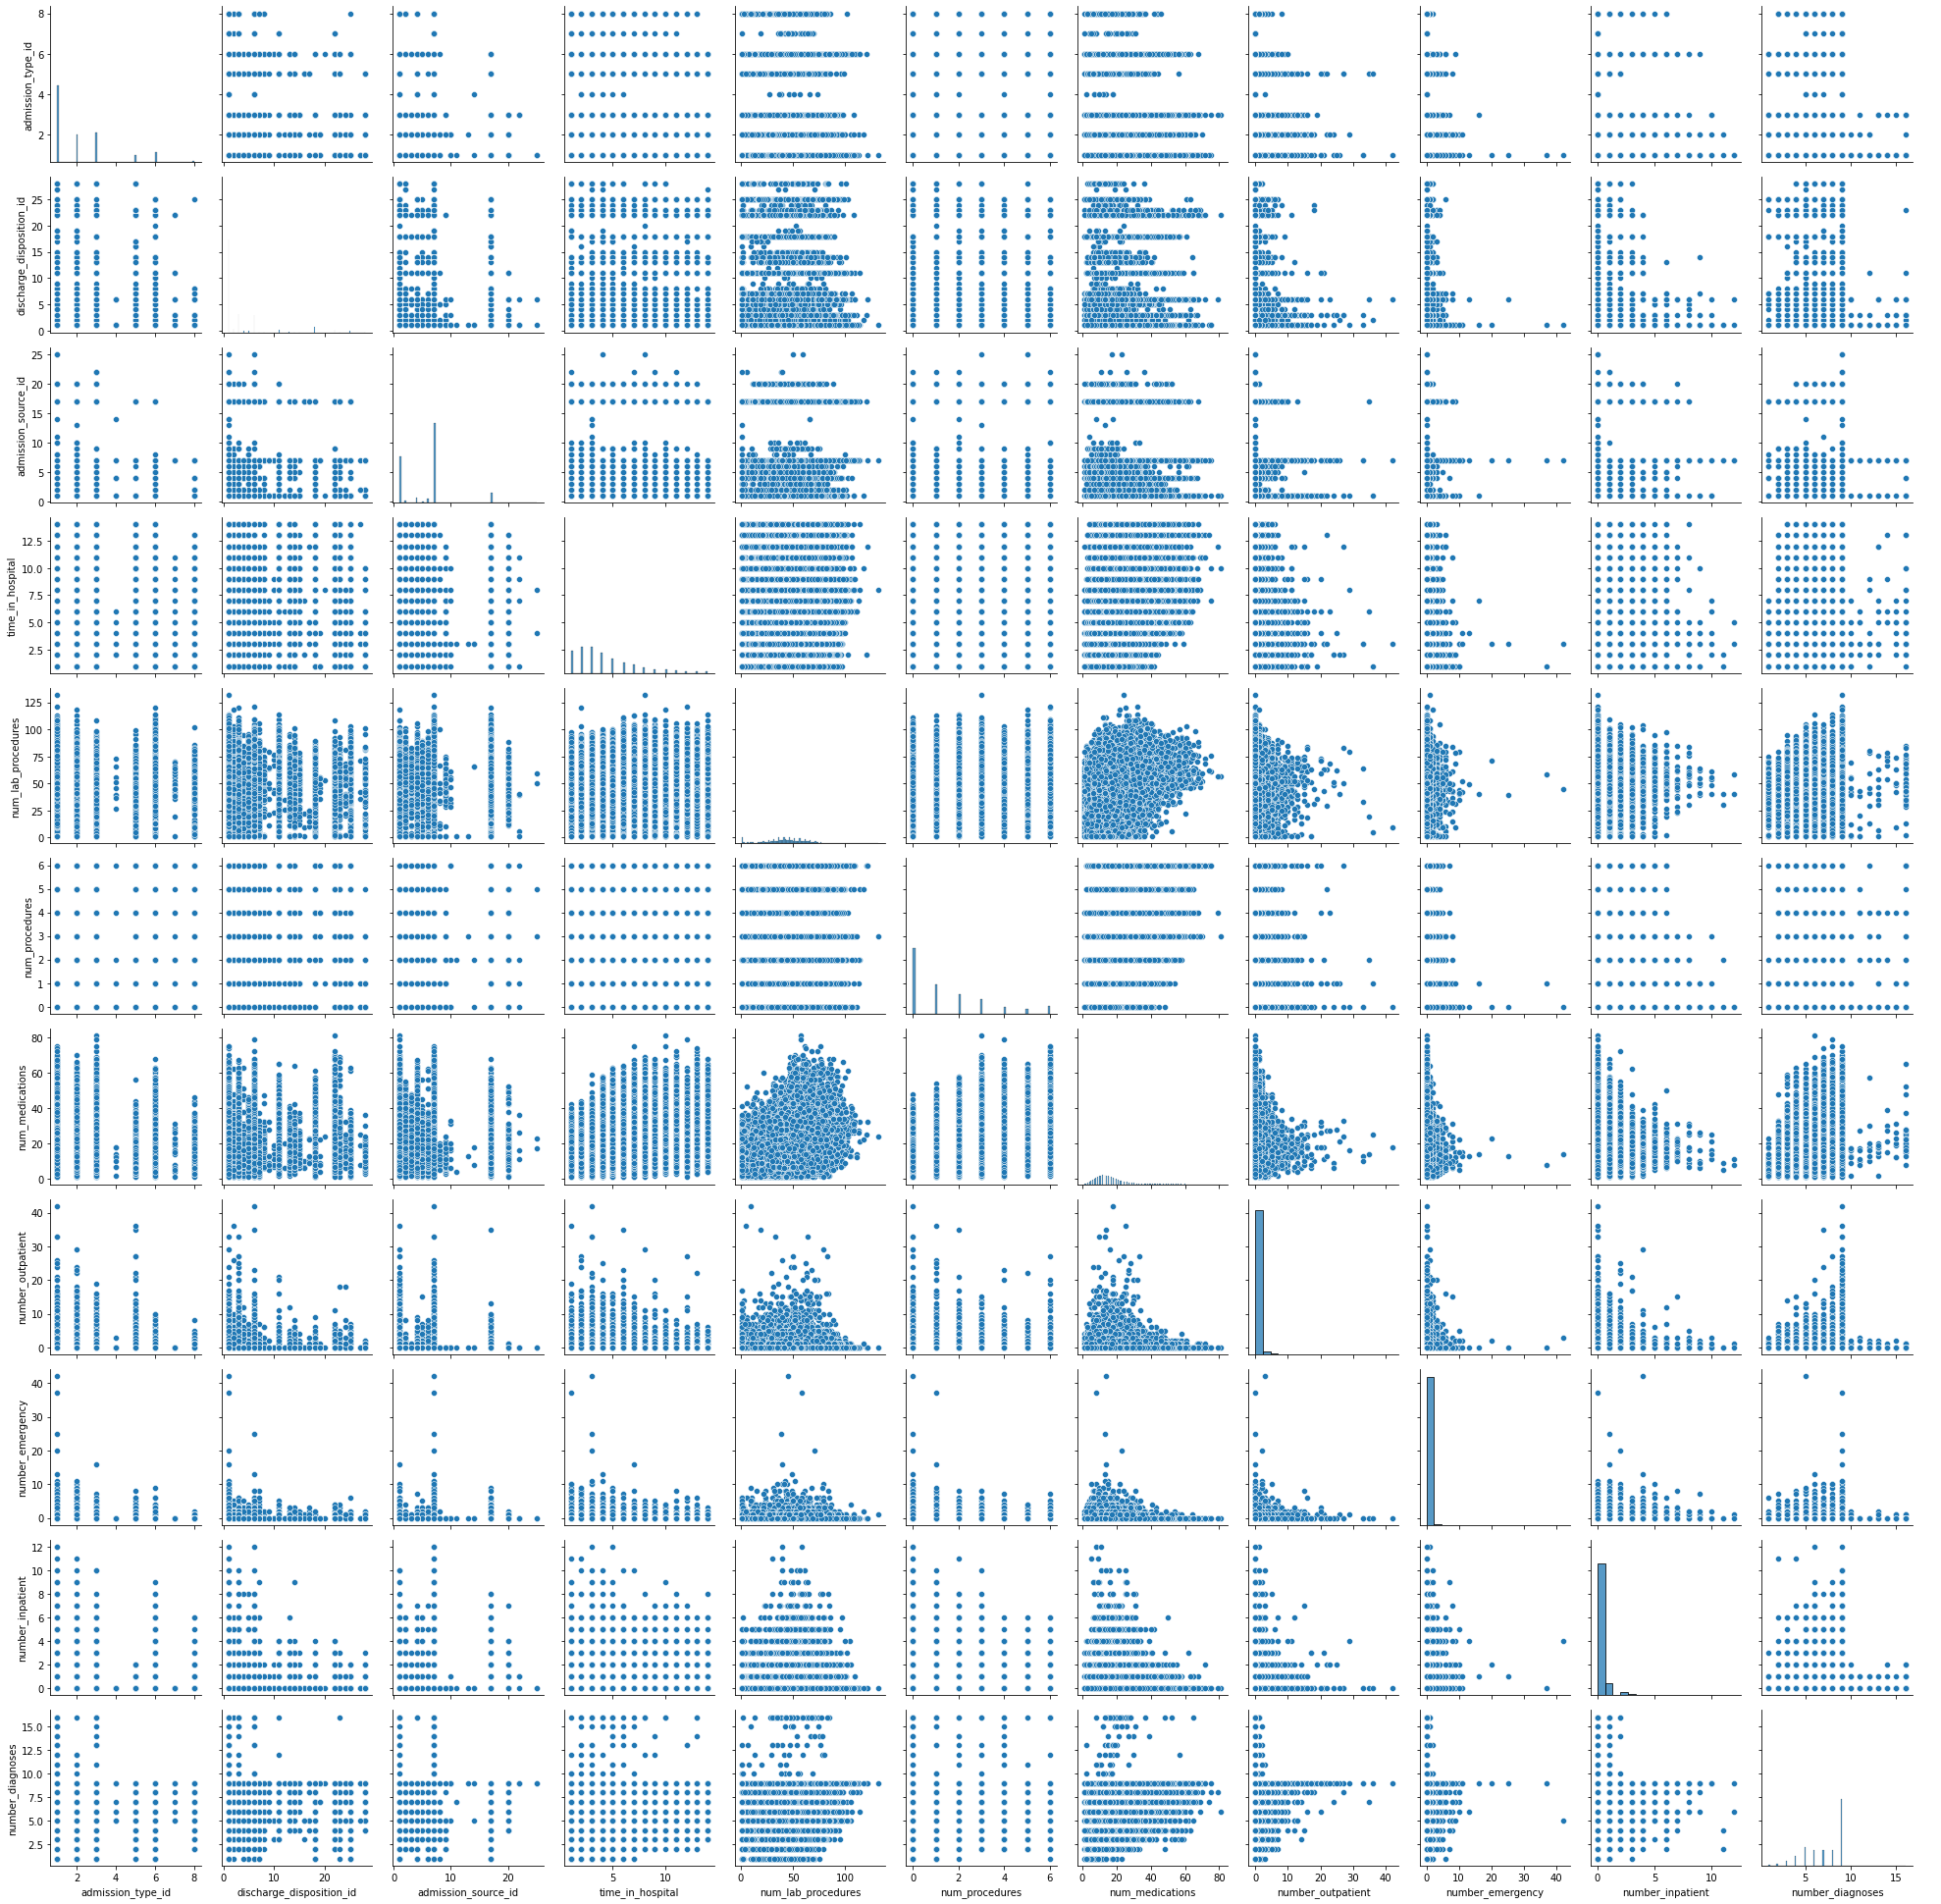

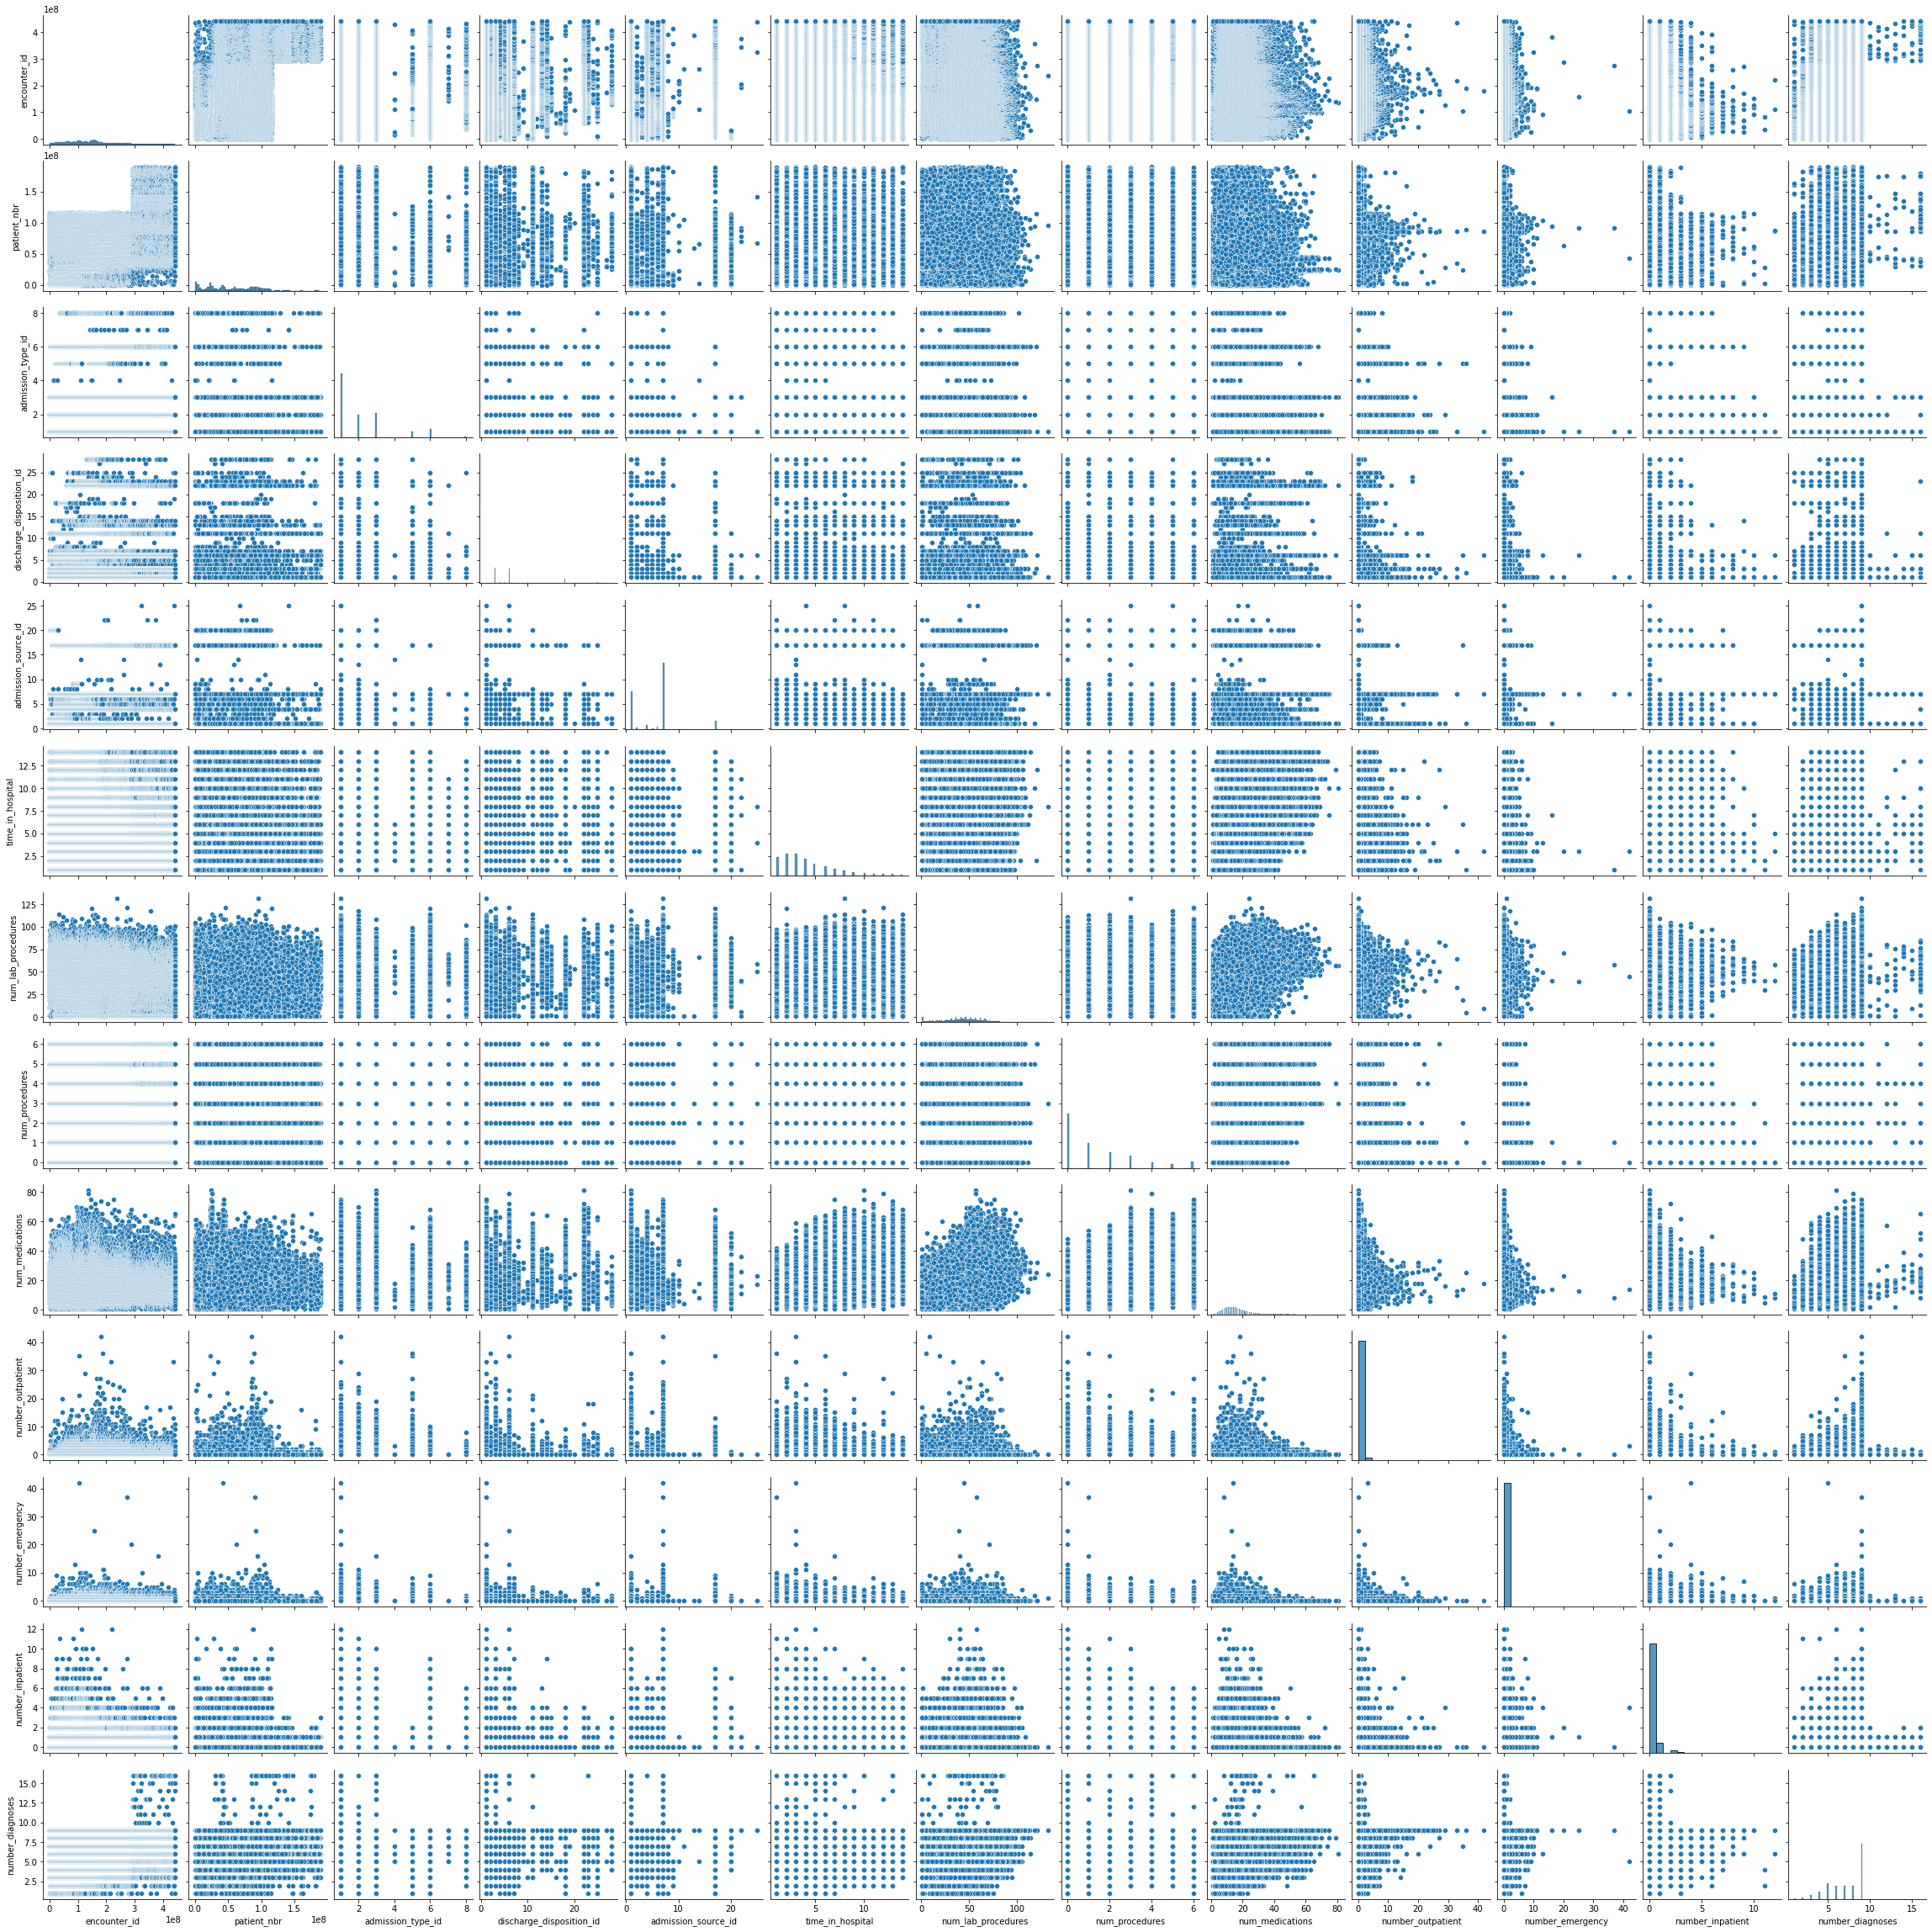

In [312]:
# Plotting Scatter plot to find out correlation between the variables
g = sns.PairGrid(df1)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
sns.pairplot(df)

In [63]:
# To find the average of values w.r.t days in hospitals
df1 = df.pivot_table(index= "time_in_hospital")
# Changing the index from time_in_hospital to normal indexes
df1.reset_index(inplace = True)

sns.pairplot(df1)
#There's a positive linear relationship between time_in_hopital and num_of_lab_procedures. As the duration in hospital increases number of lab procedures increases
#As the time_in_hospital increases number of outpatient decreases.

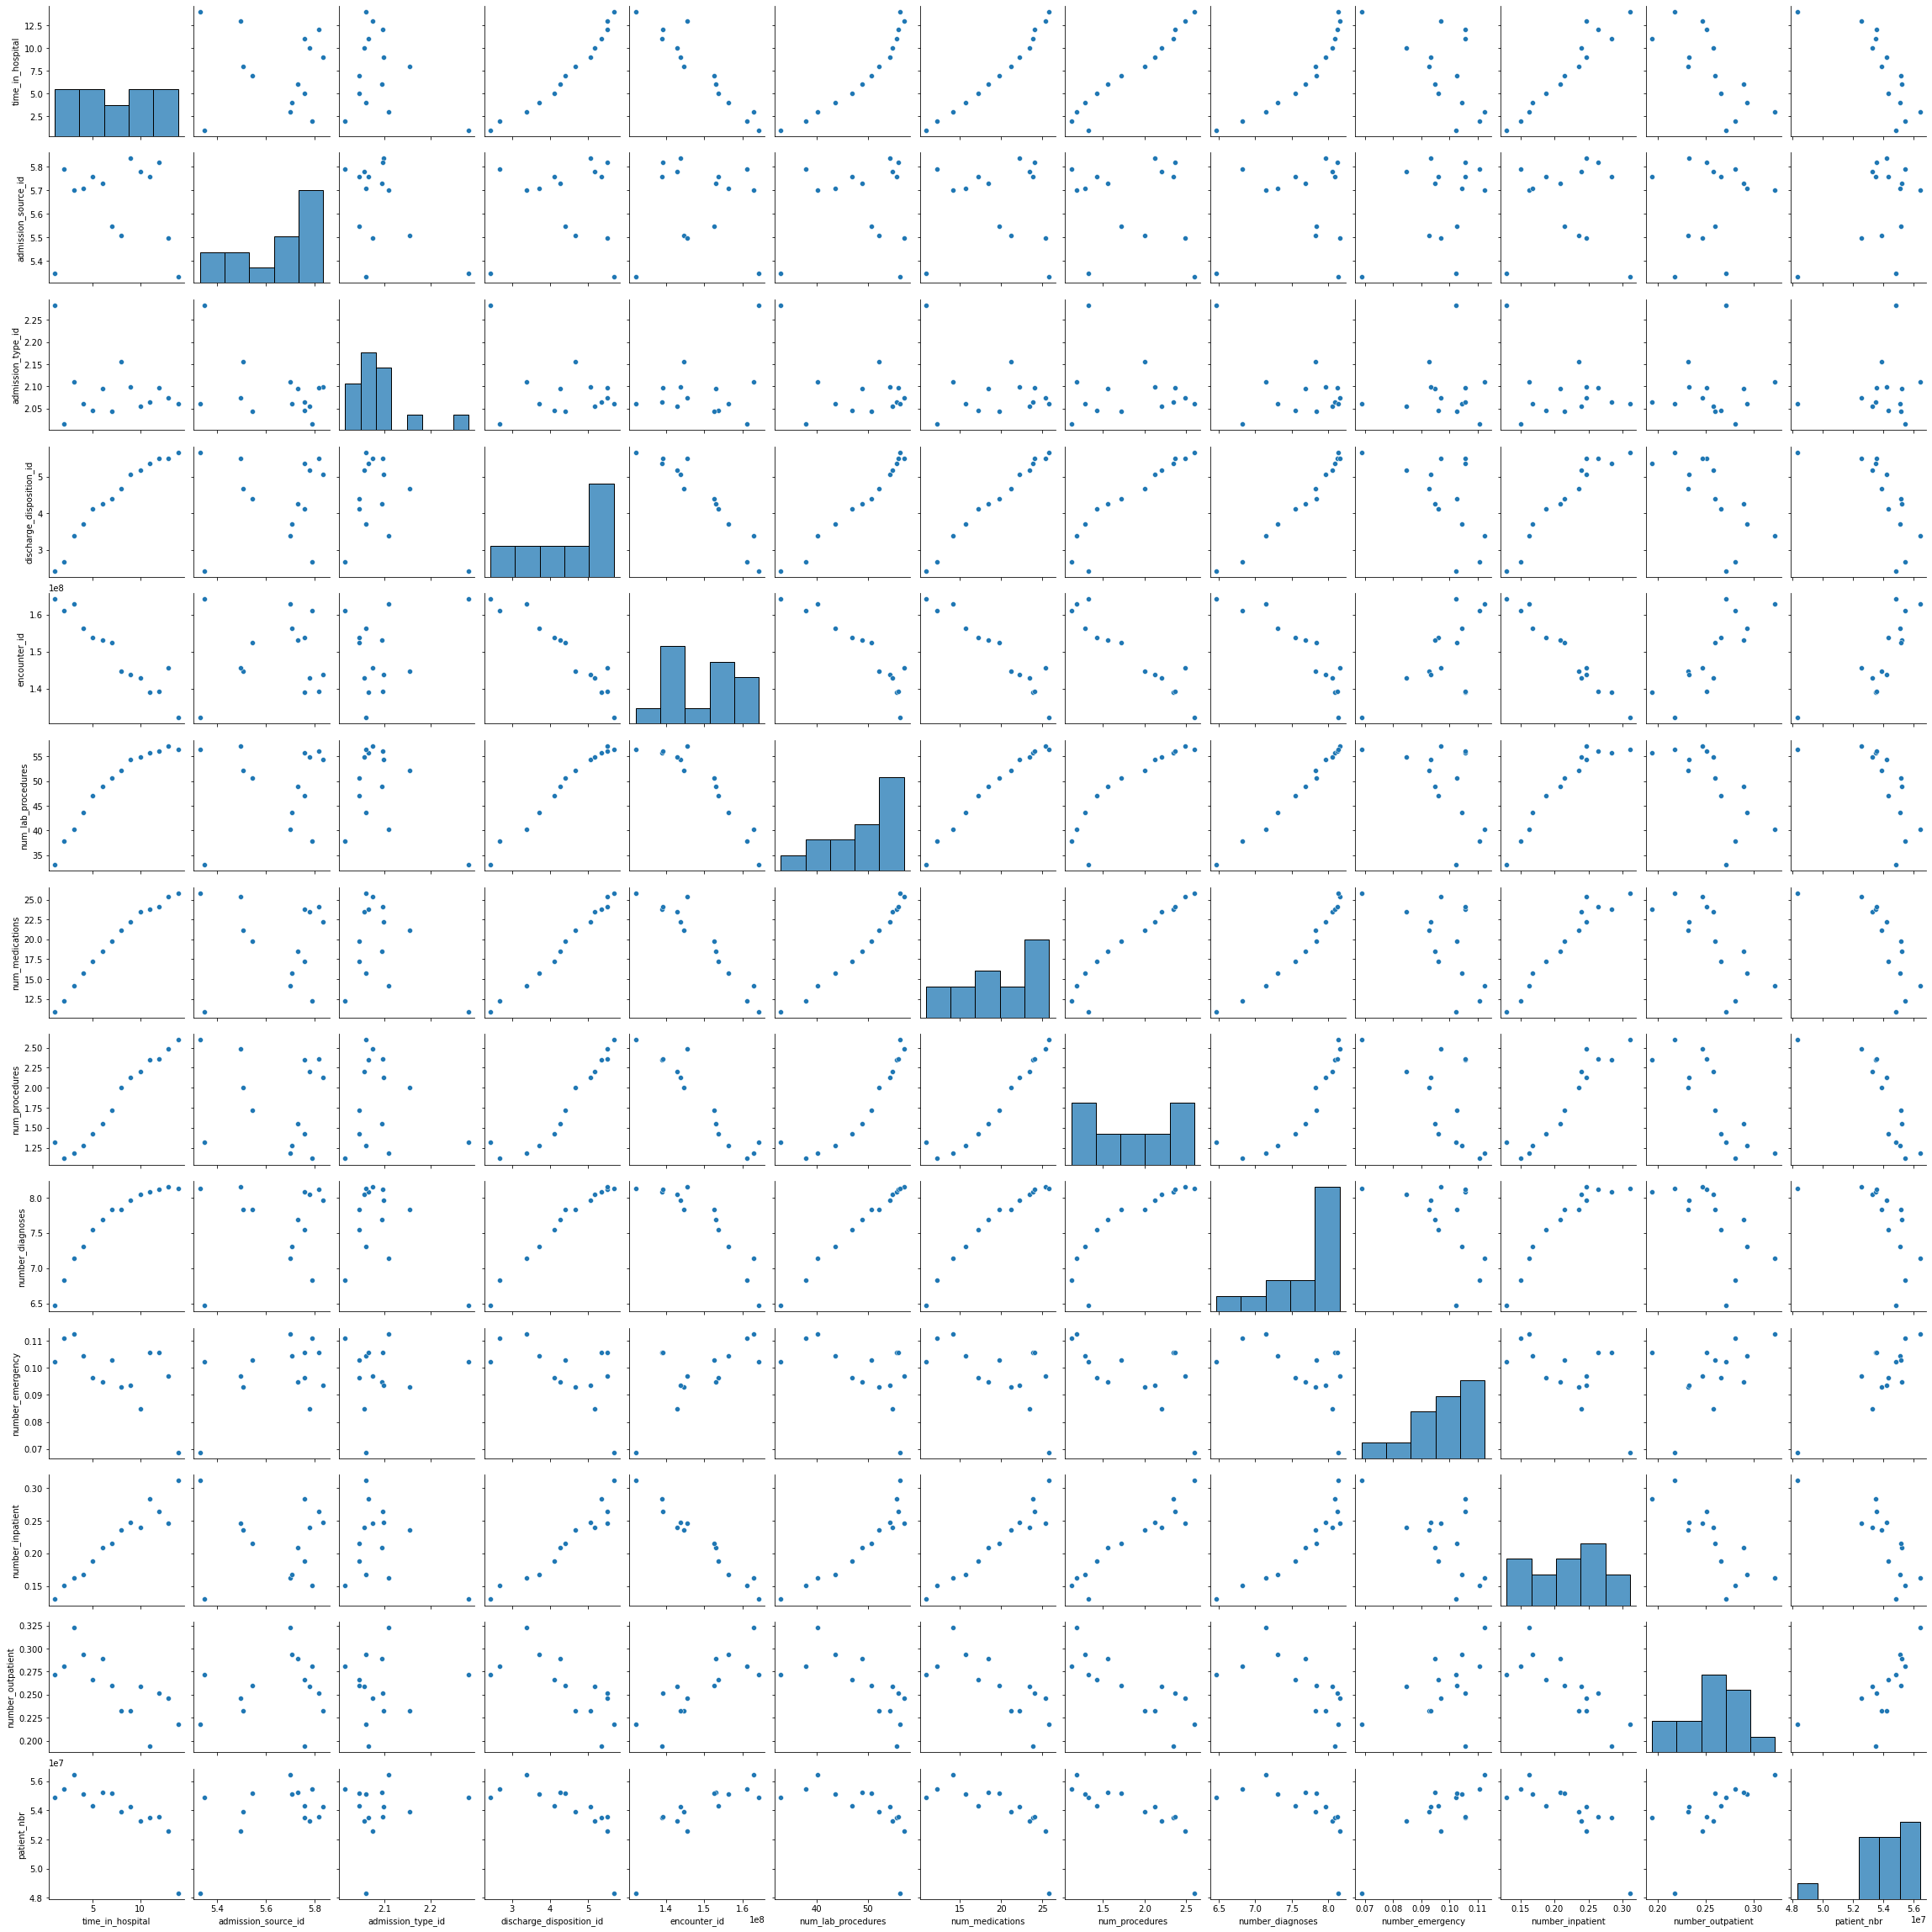

<AxesSubplot:xlabel='age', ylabel='count'>

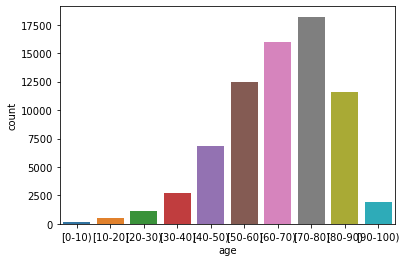

In [9]:
# Plotting Age column. 
sns.countplot(x = df1.age, data = df1)
# It can be inferred that poeple from age range 50-90 years consisted maximum of the population of the patients admitted in the hospital
# People of age range 70-80 years had majority among the age groups 

Percentage of Male:  46.83
Percentage of Female:  53.17
False


<AxesSubplot:xlabel='gender', ylabel='count'>

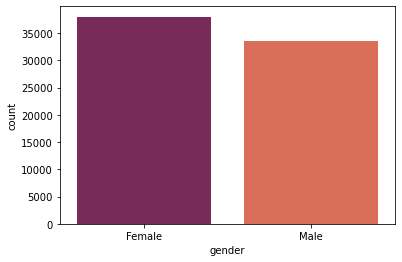

In [10]:
# Dividing and segregating w.r.t Gender

Female = (df1.gender == "Female").sum()/len(df1.gender) * 100
print("Percentage of Female: ", round(Female,2))

Male = (df1.gender == "Male").sum()/len(df1.gender) * 100
print("Percentage of Male: ", round(Male,2))

print(df1.gender.isnull().sum().any())
sns.countplot(x = df1.gender[df1.gender != "Unknown/Invalid"], palette = 'rocket')

# By observing the graph we can infer that the population of Females were slightly greater than Male



Percentage of No A1Cresult:  81.84
Percentage of A1Cresult greater than 7%:  4.04
Percentage of No A1Cresult greater than 8%:  8.81
Percentage of No A1Cresult lss than 7%:  5.3


count     71518
unique        4
top        None
freq      58532
Name: A1Cresult, dtype: object

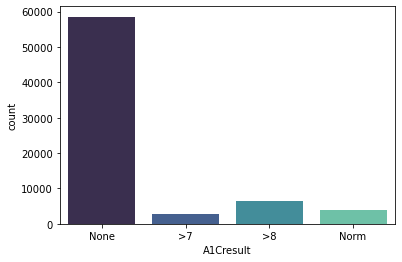

In [117]:
# Exploring the A1Cresult Data entries 

none = (df1.A1Cresult == 'None').sum()/ len(df1.A1Cresult) * 100
print("Percentage of No A1Cresult: ", round(none,2))

seven = (df1.A1Cresult == '>7').sum()/ len(df1.A1Cresult) * 100
print("Percentage of A1Cresult greater than 7%: ", round(seven,2))

eight = (df1.A1Cresult == '>8').sum()/ len(df1.A1Cresult) * 100
print("Percentage of No A1Cresult greater than 8%: ", round(eight,2))

norm = (df1.A1Cresult == 'Norm').sum()/ len(df1.A1Cresult) * 100
print("Percentage of No A1Cresult lss than 7%: ", round(norm,2))

sns.countplot(x = df1.A1Cresult, palette = "mako")
df1.A1Cresult.describe()

# It can be inferred that 81.84% data entries had no A1C result values

Percentage of people not readmitted:  60.1
Percentage of people admitted after 30 days of discharge:  31.1
Percentage of people admitted before 30 days of discharge:  8.8


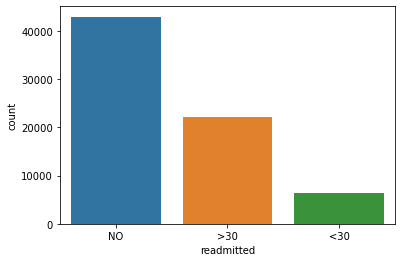

In [166]:
# Determining percentage of people readmitted

sns.countplot(x = df1["readmitted"])

NotReadmitted = (df1.readmitted == "NO").sum()/ len(df1.readmitted) * 100
print("Percentage of people not readmitted: ", round(NotReadmitted,2))

ReadmittedAfter30days = (df1.readmitted == ">30").sum()/ len(df1.readmitted) * 100
print("Percentage of people admitted after 30 days of discharge: ", round(ReadmittedAfter30days, 2))

ReadmittedBefore30days = (df1.readmitted == "<30").sum()/ len(df1.readmitted) * 100
print("Percentage of people admitted before 30 days of discharge: ", round(ReadmittedBefore30days,2))

#Percentage of people not readmitted:  60.1
#Percentage of people admitted after 30 days of discharge:  31.1
#Percentage of people admitted before 30 days of discharge:  8.8


In [96]:
# Exploring Medical Specialities of Patients 
ms = df1.medical_specialty.value_counts()
filt = df1.medical_specialty != '?'
ms = df1.medical_specialty[filt]
ms = ms.value_counts().reset_index() #rest_index is very important step to make a table
ms.columns = ['medical_specialty', 'count']
ms["percent"] = ms["count"] / len(df1.medical_specialty)
ms

#ms.percent


,medical_specialty,count,percent
0,InternalMedicine,10919,0.152675
1,Family/GeneralPractice,5118,0.071562
2,Emergency/Trauma,4465,0.062432
3,Cardiology,4266,0.059649
4,Surgery-General,2221,0.031055
...,...,...,...
65,Dermatology,1,0.000014
66,Psychiatry-Addictive,1,0.000014
67,Perinatology,1,0.000014
68,SportsMedicine,1,0.000014


<AxesSubplot:xlabel='age', ylabel='time_in_hospital'>

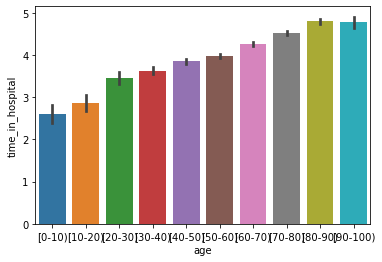

In [314]:
# Age vs Time_in_Hospital
sns.barplot(x = df1.age, y = df1.time_in_hospital)
# It can be inferred that as the age increases time_in_hospital has increased

<AxesSubplot:xlabel='A1Cresult', ylabel='num_medications'>

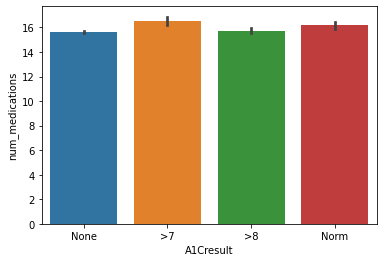

In [220]:
#A1Cresult vs num_medications
sns.barplot(x = df1.A1Cresult, y = df1.num_medications, data = df1)

<AxesSubplot:xlabel='age', ylabel='num_medications'>

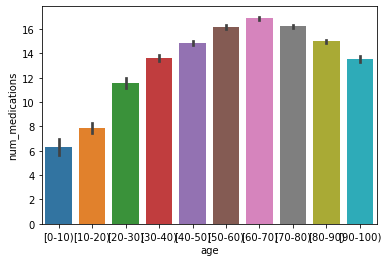

In [315]:
#Age vs Num_Medications
sns.barplot(x = df1.age, y = df1.num_medications, data = df1)
# People of Age range 50-80 required more medications relatively.
# Poeple in age group 60-70 years have the majority of population 

In [326]:
df1["admission_type_id"].unique()

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

C:\Users\keval\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='admission_type_id', ylabel='count'>

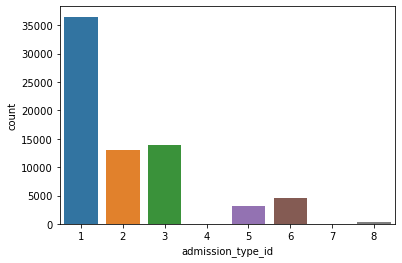

In [338]:
#Determining the type of admission of patient

sns.countplot(df1.admission_type_id)

#admission_type = {1 : "Emergency", 2 : "Urgent", 3 : "Elective", 4 : "Newborn", 5 : "NA", 6 : "NA", 7 : "Trauma center", 8 : "NA"}


Percentage of people were already on Diabetes Meds: 75.95
Percentage of people were not on Diabetes Meds: 24.05


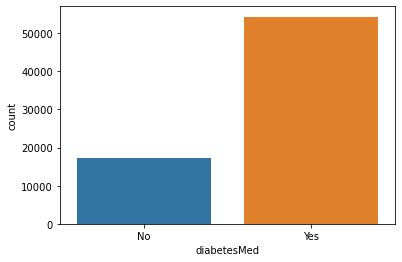

In [351]:
# Cleaning data by removing non numerical enrtries

df2 = df1

list = []
for i in df2.diag_1:
    if i[0] == "V" or i[0] == "E" or i == "?":
        list.append(i)
        
list = pd.unique(list)
print(list)     
for elem in list:
    filt = df2.diag_1 != elem
    df2 = df2[filt]

print(df2.diag_1.dtype)
df2.diag_1 = df2.diag_1.astype(float)

print(df2.diag_1.dtype)
round(df2.diag_1,0)
df2.diag_1 = df2.diag_1.astype(int)
print(df2.diag_1.dtype)

    

['V57' 'V58' 'V55' 'V53' '?' 'V45' 'V26' 'V71' 'V56' 'V67' 'V60' 'V54'
 'V43' 'V63' 'V25' 'V70' 'E909' 'V66' 'V51']
object
float64
int32


In [353]:
# Converting numerical diagnosis column entries into their categories
 
df2["diagnosis1"] = 0 
df2.info()
    
for i in range(len(df2.diag_1)):
    if (df2.iloc[i,15] >= 390 and df2.iloc[i,15] <= 459) or df2.iloc[i,15] == 785:
        df2.iloc[i,25] = "circulatory"
    elif (df2.iloc[i,15]>=460 and df2.iloc[i,15] <= 519) or df2.iloc[i,15]==786:
        df2.iloc[i,25] = "respiratory"
    elif (df2.iloc[i,15]>=520 and df2.iloc[i,15] <= 579) or df2.iloc[i,15]==787:
        df2.iloc[i,25] = "Digestive"
    elif df2.iloc[i,15]>=250 and df2.iloc[i,15] < 251 :
        df2.iloc[i,25] = "Diabetes"
    elif df2.iloc[i,15]>800 and df2.iloc[i,15] <= 999 :
        df2.iloc[i,25] = "Injury"
    elif df2.iloc[i,15]>=710 and df2.iloc[i,15] <= 73 :
        df2.iloc[i,25] = "Musculoskeletal"
    elif (df2.iloc[i,15]>=580 and df2.iloc[i,15] <= 629) or df2.iloc[i,15]==788:
        df2.iloc[i,25] = "Genitourinary"
    
    elif (df2.iloc[i,15]>=140 and df2.iloc[i,15] <= 239) or (df2.iloc[i,15]>=790 and df2.iloc[i,15] <= 799) or df2.iloc[i,15]==780 or (df2.iloc[i,15]>=240 and df2.iloc[i,15] < 250) or (df2.iloc[i,15]>=251 and df2.iloc[i,15] <= 279) or (df2.iloc[i,15]>=680 and df2.iloc[i,15] <= 709) or (df2.iloc[i,15]>= 1 and df2.iloc[i,15] <= 139) or df2.iloc[i,15]==781 or df2.iloc[i,15]==782 or df2.iloc[i,15]==784 :
            df2.iloc[i,25] = "Neoplasms"


filt = df2["diagnosis1"] == 0
df2.diagnosis1.iloc[filt] = "other"

df2.diagnosis1

C:\Users\keval\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0              Diabetes
1             Neoplasms
2                 other
3             Neoplasms
4             Neoplasms
              ...      
101754        Digestive
101755    Genitourinary
101756           Injury
101758            other
101765        Digestive
Name: diagnosis1, Length: 70579, dtype: object

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

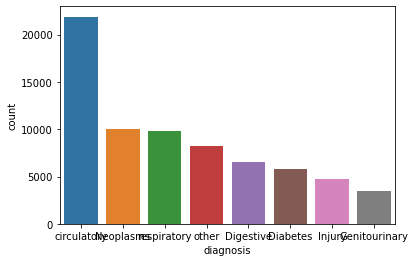

In [354]:
# Plotting Diagnosis 1 coliumn

diag = df2["diagnosis1"].value_counts().reset_index()
diag.columns = ['diagnosis','count']
sns.barplot(x = diag['diagnosis'], y = diag['count'])

# The graph concludes that people are most likely to get diagnosed with circulatory problems

In [355]:
# Using .get_dummies to encode variables
categorical = ['race']

for c in categorical:
    df2 = pd.concat([df2, pd.get_dummies(df2[c], prefix=c)], axis=1)
    df2.drop(columns=c)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glyburide-metformin,diabetesMed,readmitted,diagnosis1,race_?,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other
0,Caucasian,Female,[0-10),6,25,1,1,?,Pediatrics-Endocrinology,41,...,No,No,NO,Diabetes,0,0,0,1,0,0
1,Caucasian,Female,[10-20),1,1,7,3,?,?,59,...,No,Yes,>30,Neoplasms,0,0,0,1,0,0
2,AfricanAmerican,Female,[20-30),1,1,7,2,?,?,11,...,No,Yes,NO,other,0,1,0,0,0,0
3,Caucasian,Male,[30-40),1,1,7,2,?,?,44,...,No,Yes,NO,Neoplasms,0,0,0,1,0,0
4,Caucasian,Male,[40-50),1,1,7,1,?,?,51,...,No,Yes,NO,Neoplasms,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,Caucasian,Female,[70-80),1,1,7,9,?,?,50,...,No,Yes,>30,Digestive,0,0,0,1,0,0
101755,Other,Female,[40-50),1,1,7,14,MD,?,73,...,No,Yes,>30,Genitourinary,0,0,0,0,0,1
101756,Other,Female,[60-70),1,1,7,2,MD,?,46,...,No,Yes,>30,Injury,0,0,0,0,0,1
101758,Caucasian,Female,[80-90),1,1,7,5,MC,?,76,...,No,Yes,NO,other,0,0,0,1,0,0


In [357]:
# Converting/Encoding race categorical entries into numerical entries
print(df2.race.unique())
for c in range(len(df2.race)):
    if df2.iloc[c,0] == '?':
        df2.iloc[c,26] = 0
    else :
        a = df2.iloc[c,0]
        b = len(df2.race[df2.race == a])/ len(df2.race)
        df2.iloc[c,26] = b


['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


In [358]:
#Using Label Encoder method for encoding Categorical Variables 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df2['age_label'] = label_encoder.fit_transform(df2['age'])
df2['gender_bool'] = label_encoder.fit_transform(df2['gender'])
df2['diabetesMed'] = label_encoder.fit_transform(df2['diabetesMed'])
df2['readmitted_bool'] = np.where(df2['readmitted']=='NO', 0, 1)
df2['readmitted_bool'].value_counts()

df2.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'glyburide-metformin', 'diabetesMed', 'readmitted', 'diagnosis1',
       'race_?', 'race_AfricanAmerican', 'race_Asian', 'race_Caucasian',
       'race_Hispanic', 'race_Other', 'age_label', 'gender_bool',
       'readmitted_bool'],
      dtype='object')

<ipython-input-375-20c2e2cbd998>:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = rfc.fit(X_train, y_train)


Accuracy of the rfc Model: 0.9961083613556504
Precision of the rfc Model: 0.4795703454085931
Recall score of the rfc Model: 0.32454389965792474


Text(33.0, 0.5, 'actual')

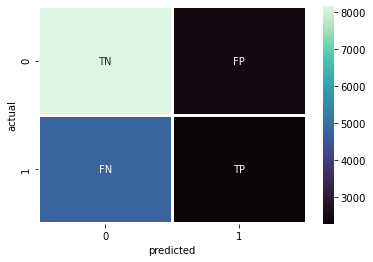

In [375]:
# Fitting RandomForestClassiffication to predict whether a patient will be readmitted or not

from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score, recall_score, confusion_matrix

rfc = RandomForestClassifier(random_state = 50)

y = df2["readmitted_bool"].values.reshape(-1,1) # Target Variable

X = df2[["admission_type_id", "discharge_disposition_id", "time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications",
     "num_medications", "diabetesMed", "race_AfricanAmerican", "race_Asian" , "race_Caucasian", "race_Hispanic", "race_Other", "age_label", "gender_bool" ]]

# Splitting the data into Training and Testing model.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

rfc = rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test) #Predicting target variable using X_test

#rfc = rfc.fit(X,y) # Fitting RandomForestClassifier

acc = rfc.score(X_train, y_train) 
print("Accuracy of the rfc Model:",acc)

precision = precision_score(y_true=y_test, y_pred=y_pred) #Calculating Precision of the model using precision_score. 
recall = recall_score(y_true=y_test, y_pred=y_pred) #Calculating recall of the model using recall_score. 

print("Precision of the rfc Model:", precision)
print("Recall score of the rfc Model:", recall)

confusion = confusion_matrix(y_true=y_test, y_pred=y_pred) 
labels = np.array([['TN','FP'],['FN','TP']])

sns.heatmap(confusion,annot=labels, fmt='', linewidths=2, cmap="mako")
plt.xlabel("predicted")
plt.ylabel("actual")

In [365]:
from sklearn import metrics
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionmatrix)

[[10578    37]
 [   46  6984]]


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df2["readmitted_bool"].values.reshape(-1,1)

print(X.shape)

X = df2[["admission_type_id", "discharge_disposition_id", "time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications",
     "num_medications", "diabetesMed", "race_AfricanAmerican", "race_Asian" , "race_Caucasian", "race_Hispanic", "race_Other", "age_label", "gender_bool" ]]
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

lr = LogisticRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


precision = precision_score(y_true=y_test, y_pred=y_pred) #Calculating Precision of the model using precision_score. 
recall = recall_score(y_true=y_test, y_pred=y_pred) #Calculating recall of the model using recall_score. 

print("Precision of the rfc Model:", precision)
print("Recall score of the rfc Model:", recall)

confusion = confusion_matrix(y_true=y_test, y_pred=y_pred)
labels = np.array([['TN','FP'],['FN','TP']])

sns.heatmap(confusion,annot=labels, fmt='', linewidths=2, cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("actual")

NameError: name 'df2' is not defined